# 1.Define the problem and perform Exploratory Data Analysis


**Context**

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.


**Objective**

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

## 1.1 Read the data as an appropriate time series data


In [1]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.seasonal as seasonal_decompose
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#We have two types of wine data :  and sparkling lets read one by one

sparkling_data = pd.read_csv('/content/drive/MyDrive/TSF/Sparkling.csv')


In [4]:
sparkling_data.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [5]:
sparkling_data.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [6]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(sparkling_data))

In [7]:
import calendar
sparkling_data['Month'] = dates.month
sparkling_data['Month'] = sparkling_data['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names
sparkling_data['Year'] = dates.year

In [8]:
sparkling_data.drop(['YearMonth'], axis=1, inplace=True)
sparkling_data.rename(columns={'Sparkling':'Sparkling_wine-Sales'}, inplace=True)
sparkling_data = sparkling_data[['Month', 'Year', 'Sparkling_wine-Sales']]

In [9]:
sparkling_data.set_index(dates, inplace=True)

In [10]:
sparkling_data.head(5)

,Month,Year,Sparkling_wine-Sales
1980-01-01,Jan,1980,1686
1980-02-01,Feb,1980,1591
1980-03-01,Mar,1980,2304
1980-04-01,Apr,1980,1712
1980-05-01,May,1980,1471



## 1.2 Plot the data



In [11]:
# extract out the time-series
sales_rs = sparkling_data['Sparkling_wine-Sales']

Text(0, 0.5, 'Sparkling Wine Sales')

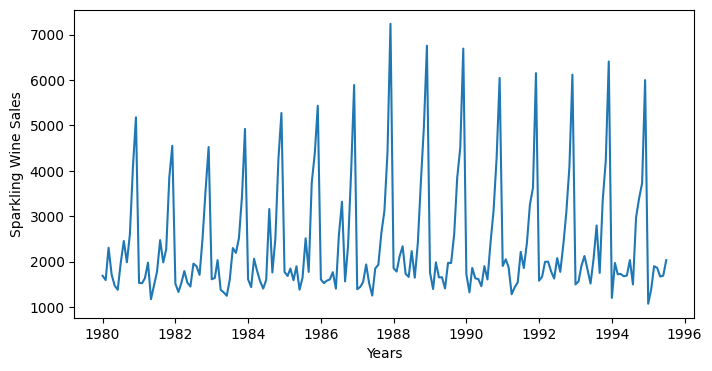

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(sales_rs)
plt.xlabel('Years')
plt.ylabel('Sparkling Wine Sales')

## 1.3 Perform EDA



In [13]:
#Checking the structure of rose dataset
sparkling_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 187 non-null    object
 1   Year                  187 non-null    int32 
 2   Sparkling_wine-Sales  187 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 5.1+ KB


In [14]:
monthly_sales_data = pd.pivot_table(sparkling_data, values = "Sparkling_wine-Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Dec,5179.0,4551.0,4524.0,4923.0,5274.0,5434.0,5891.0,7242.0,6757.0,6694.0,6047.0,6153.0,6119.0,6410.0,5999.0,NaN
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0


In [15]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Sep,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


<Axes: xlabel='Month'>

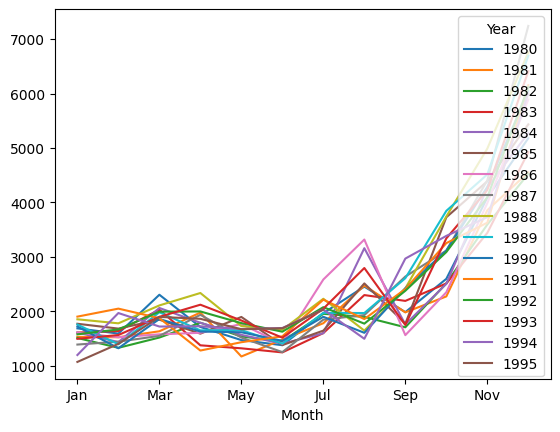

In [16]:
monthly_sales_data.plot()

In [17]:
yearly_sales_data = pd.pivot_table(sparkling_data, values = "Sparkling_wine-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


<Axes: xlabel='Year'>

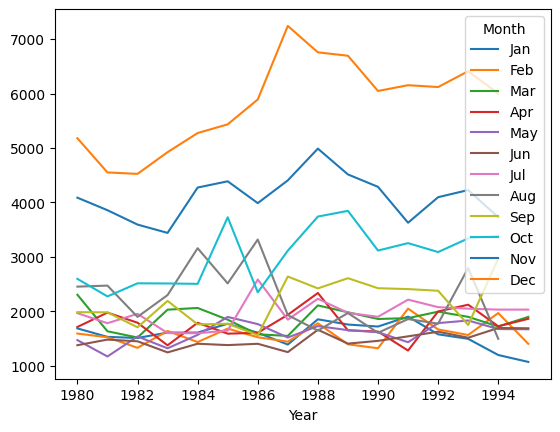

In [18]:
yearly_sales_data.plot()

<Axes: >

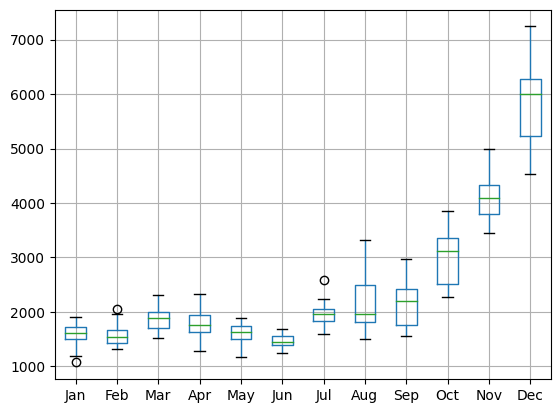

In [19]:
yearly_sales_data.boxplot()

In [20]:
missing_values = sparkling_data.isnull().sum()
print(missing_values)


Month                   0
Year                    0
Sparkling_wine-Sales    0
dtype: int64


In [21]:
sparkling_data['Sparkling_wine-Sales'] = sparkling_data['Sparkling_wine-Sales'].fillna(method='ffill')  # Example: Forward fill


<ipython-input-21-ad9b8e6793eb>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sparkling_data['Sparkling_wine-Sales'] = sparkling_data['Sparkling_wine-Sales'].fillna(method='ffill')  # Example: Forward fill


In [22]:
# # Linear interpolation
# df_interpolated_linear = rose_data.interpolate(method='linear')

# # Time-based interpolation (requires the index to be a datetime)
# df_interpolated_time = rose_data.interpolate(method='time')

# # Spline interpolation
# df_interpolated_spline = rose_data.interpolate(method='spline', order=2)

## 1.4 Perform Decomposition

In [23]:
# Find duplicates excluding the first occurrence
duplicates_only = sparkling_data[sparkling_data.index.duplicated(keep='first')]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicates_only)

# Print the count of duplicate occurrences
print(f"Number of duplicate rows: {duplicates_only.shape[0]}")

Duplicate rows:
Empty DataFrame
Columns: [Month, Year, Sparkling_wine-Sales]
Index: []
Number of duplicate rows: 0


In [24]:
# rose_data = rose_data.drop_duplicates()

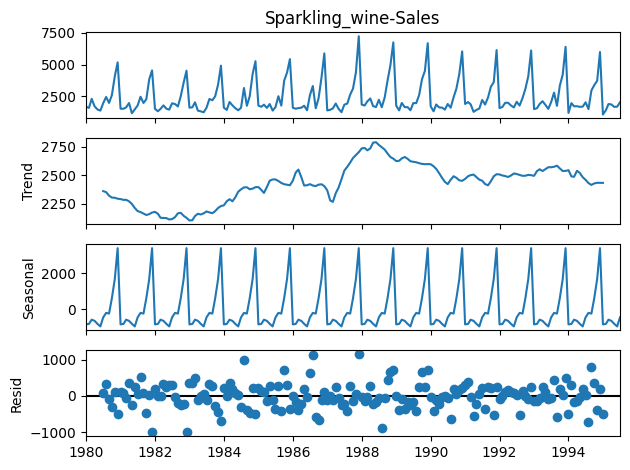

In [25]:
result = sm.tsa.seasonal_decompose(sparkling_data['Sparkling_wine-Sales'], model='additive', period=12)
result.plot()
plt.show()

## 2 Data Pre-processing

### 2.1 Missing value treatment

### 2.2 Visualize the processed data

### 2.3 Train-test split

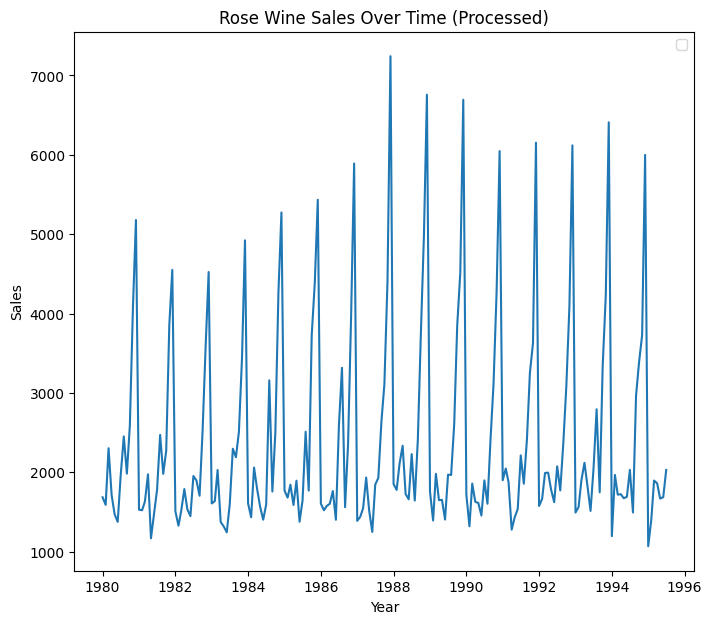

            Sparkling_wine-Sales
1980-01-01                  1686
1980-02-01                  1591
1980-03-01                  2304
1980-04-01                  1712
1980-05-01                  1471
...                          ...
1995-03-01                  1897
1995-04-01                  1862
1995-05-01                  1670
1995-06-01                  1688
1995-07-01                  2031

[187 rows x 1 columns]


In [26]:
#  #Step 2: Data Preprocessing
# # Missing value treatment
# # Check for missing values
# missing_values = rose_data.isnull().sum()
# print("Missing values in the dataset:\n", missing_values)

# # Since there are no missing values in the given dataset, no treatment is required. If there were missing values, you could use methods like interpolation or filling with the mean/median.
# # For demonstration, let's assume we use forward fill method to handle missing values if any.
# rose_data = rose_data.fillna(method='ffill')

# Step 3: Visualize the processed data
plt.figure(figsize=(8, 7))
plt.plot(sparkling_data['Sparkling_wine-Sales'])
plt.title('Rose Wine Sales Over Time (Processed)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Drop the 'Year' and 'Month' columns from the DataFrame
sparkling_data_dropped = sparkling_data.drop(['Year', 'Month'], axis=1)

# To see the modified DataFrame
print(sparkling_data_dropped)

# Step 4: Train-test split
train = sparkling_data_dropped[sparkling_data_dropped.index < '1993-01-01']
test = sparkling_data_dropped[sparkling_data_dropped.index >= '1993-01-01']


3.Model Building - Original Data

3.1 Build forecasting models

3.1.1 Linear regression

3.1.2 Simple Average

3.1.3 Moving Average

3.1.4 Exponential Models (Single, Double, Triple)

3.5 Check the performance of the models built

In [27]:
# Printing the Rose Wine Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Sparkling_wine-Sales
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1992-08-01,1773
1992-09-01,2377
1992-10-01,3088
1992-11-01,4096


Test Data


,Sparkling_wine-Sales
1993-01-01,1494
1993-02-01,1564
1993-03-01,1898
1993-04-01,2121
1993-05-01,1831
1993-06-01,1515
1993-07-01,2048
1993-08-01,2795
1993-09-01,1749
1993-10-01,3339


<font size = 5 color='SaddleBrown' style="font-family:verdana"> 3.1.1 Linear Regression Model



For this particular linear regression, we are going to regress the 'Sparkling wine Saes' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [28]:
print(train.shape)
print(test.shape)

(156, 1)
(31, 1)


In [29]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+156 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]
Test Time instance 
 [156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [30]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [31]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling_wine-Sales,time
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling_wine-Sales,time
1992-08-01,1773,152
1992-09-01,2377,153
1992-10-01,3088,154
1992-11-01,4096,155
1992-12-01,6119,156


First few rows of Test Data


,Sparkling_wine-Sales,time
1993-01-01,1494,156
1993-02-01,1564,157
1993-03-01,1898,158
1993-04-01,2121,159
1993-05-01,1831,160


Last few rows of Test Data


,Sparkling_wine-Sales,time
1995-03-01,1897,182
1995-04-01,1862,183
1995-05-01,1670,184
1995-06-01,1688,185
1995-07-01,2031,186


Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling_wine-Sales'])


LinearRegression()

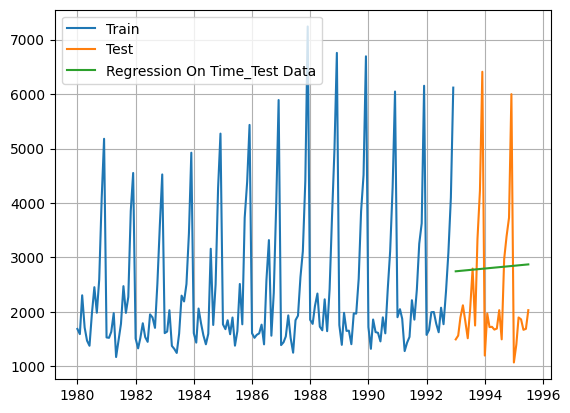

In [33]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling_wine-Sales'], label='Train')
plt.plot(test['Sparkling_wine-Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [34]:
#### Defining the functions for calculating the accuracy metrics.
from sklearn import metrics
### Model Evaluation
rmse_model1_test = metrics.mean_squared_error(test['Sparkling_wine-Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1342.993 


,Test RMSE
RegressionOnTime,1342.992772


<font size = 5 color='SaddleBrown' style="font-family:verdana"> 3.1.2 Simple Average Model

For this particular simple average method, we will forecast by using the average of the training values

In [35]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Sparkling_wine-Sales'].mean()
SimpleAverage_test.head()


,Sparkling_wine-Sales,mean_forecast
1993-01-01,1494,2417.032051
1993-02-01,1564,2417.032051
1993-03-01,1898,2417.032051
1993-04-01,2121,2417.032051
1993-05-01,1831,2417.032051


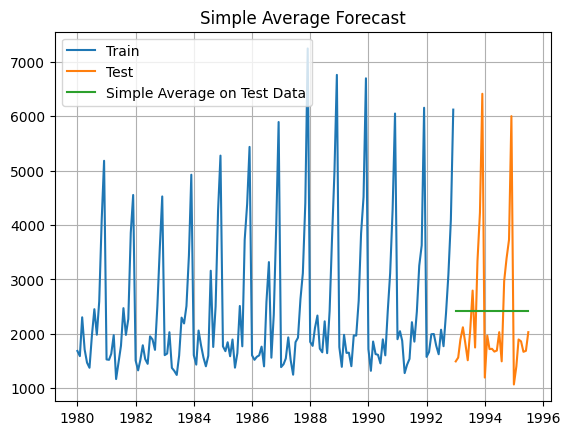

In [36]:
plt.plot(SimpleAverage_train['Sparkling_wine-Sales'], label='Train')
plt.plot(SimpleAverage_test['Sparkling_wine-Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [37]:
#Model Evaluation
rmse_model3_test = metrics.mean_squared_error(test['Sparkling_wine-Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1258.178


In [38]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE
RegressionOnTime,1342.992772
SimpleAverageModel,1258.178011


<font size = 5 color='SaddleBrown' style="font-family:verdana"> 3.1.2 Moving Average Model

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [39]:
MovingAverage = sparkling_data.copy()
MovingAverage.head()

,Month,Year,Sparkling_wine-Sales
1980-01-01,Jan,1980,1686
1980-02-01,Feb,1980,1591
1980-03-01,Mar,1980,2304
1980-04-01,Apr,1980,1712
1980-05-01,May,1980,1471


Trailing moving averages

In [40]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling_wine-Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling_wine-Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling_wine-Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling_wine-Sales'].rolling(9).mean()

MovingAverage.head()

,Month,Year,Sparkling_wine-Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
1980-01-01,Jan,1980,1686,NaN,NaN,NaN,NaN
1980-02-01,Feb,1980,1591,1638.5,NaN,NaN,NaN
1980-03-01,Mar,1980,2304,1947.5,NaN,NaN,NaN
1980-04-01,Apr,1980,1712,2008.0,1823.25,NaN,NaN
1980-05-01,May,1980,1471,1591.5,1769.50,NaN,NaN


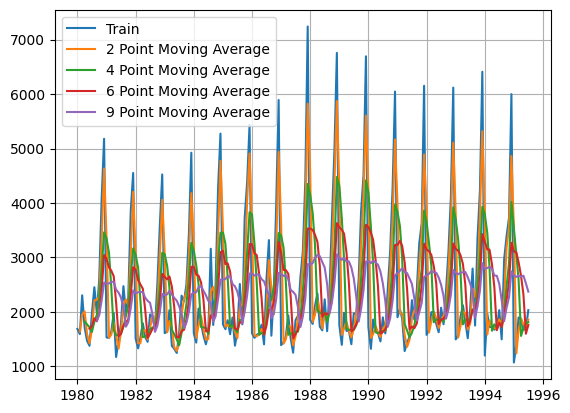

In [41]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling_wine-Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [42]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)]
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

In [43]:
trailing_MovingAverage_train.shape

(130, 7)

In [44]:
trailing_MovingAverage_test.shape

(57, 7)

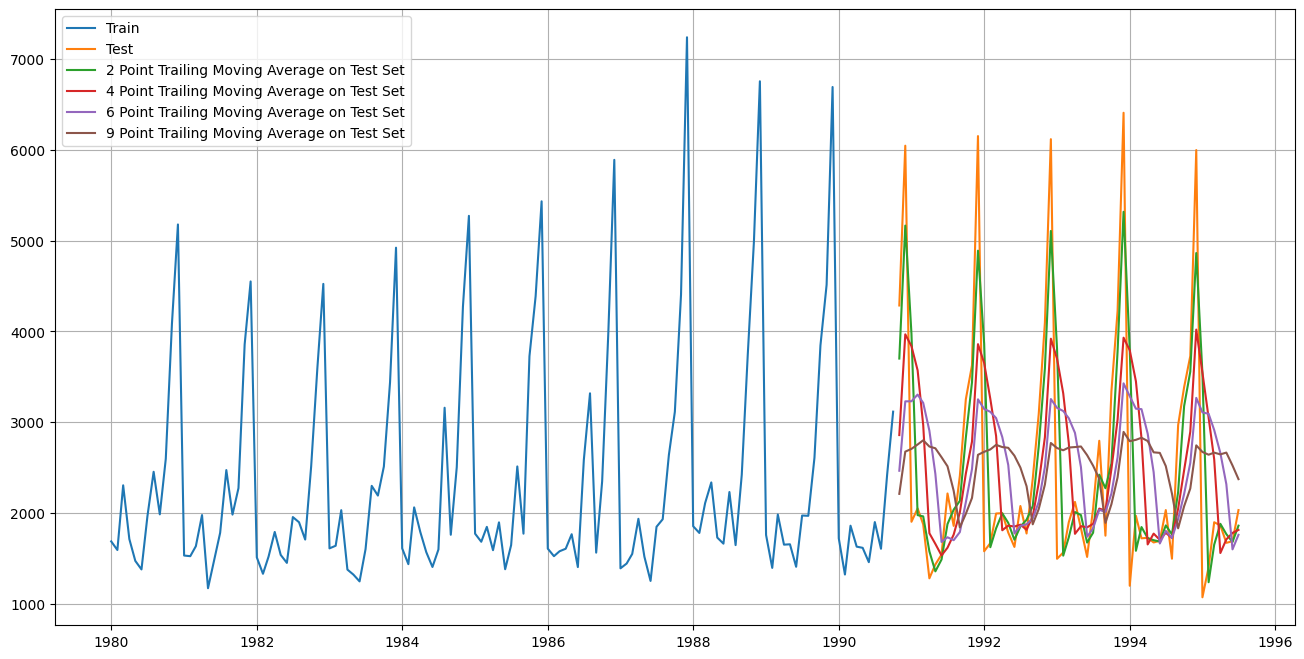

In [45]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling_wine-Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling_wine-Sales'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [46]:
## Test Data - RMSE  --> 2 point Trailing MA

import numpy as np
import pandas as pd
from sklearn import metrics

# Assuming 'test' is your DataFrame with the actual values
test_copy = test.copy()
# Calculate the moving averages for different windows
test_copy['Trailing_2'] = test_copy['Sparkling_wine-Sales'].rolling(window=2).mean()
test_copy['Trailing_4'] = test_copy['Sparkling_wine-Sales'].rolling(window=4).mean()
test_copy['Trailing_6'] = test_copy['Sparkling_wine-Sales'].rolling(window=6).mean()
test_copy['Trailing_9'] = test_copy['Sparkling_wine-Sales'].rolling(window=9).mean()

# Drop NaN values from the test set for each moving average
test_2 = test_copy.dropna(subset=['Trailing_2'])
test_4 = test_copy.dropna(subset=['Trailing_4'])
test_6 = test_copy.dropna(subset=['Trailing_6'])
test_9 = test_copy.dropna(subset=['Trailing_9'])

# Calculate RMSE for 2-point Moving Average
rmse_model4_test_2 = metrics.mean_squared_error(test_2['Sparkling_wine-Sales'], test_2['Trailing_2'], squared=False)
print("For 2-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_2)

# Calculate RMSE for 4-point Moving Average
rmse_model4_test_4 = metrics.mean_squared_error(test_4['Sparkling_wine-Sales'], test_4['Trailing_4'], squared=False)
print("For 4-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_4)

# Calculate RMSE for 6-point Moving Average
rmse_model4_test_6 = metrics.mean_squared_error(test_6['Sparkling_wine-Sales'], test_6['Trailing_6'], squared=False)
print("For 6-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_6)

# Calculate RMSE for 9-point Moving Average
rmse_model4_test_9 = metrics.mean_squared_error(test_9['Sparkling_wine-Sales'], test_9['Trailing_9'], squared=False)
print("For 9-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_9)


For 2-point Moving Average Model forecast on the Test Data, RMSE is 769.337
For 4-point Moving Average Model forecast on the Test Data, RMSE is 1122.415
For 6-point Moving Average Model forecast on the Test Data, RMSE is 1298.119
For 9-point Moving Average Model forecast on the Test Data, RMSE is 1451.127


In [47]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1342.992772
SimpleAverageModel,1258.178011
2pointTrailingMovingAverage,769.337025
4pointTrailingMovingAverage,1122.415154
6pointTrailingMovingAverage,1298.119071
9pointTrailingMovingAverage,1451.127211


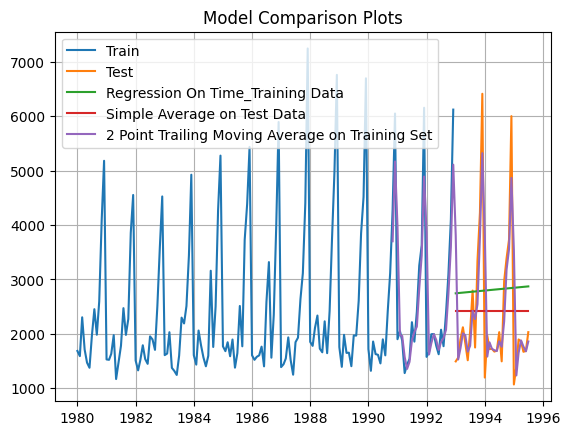

In [48]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling_wine-Sales'], label='Train')
plt.plot(test['Sparkling_wine-Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

<font size = 5 color='SaddleBrown' style="font-family:verdana"> 3.1.3 Exponential Models

### A. SIMPLE EXPONENTIAL SMOOTHING

In [49]:
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [50]:
# Printing the Rose wine Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Sparkling_wine-Sales
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1992-08-01,1773
1992-09-01,2377
1992-10-01,3088
1992-11-01,4096


Test Data


,Sparkling_wine-Sales
1993-01-01,1494
1993-02-01,1564
1993-03-01,1898
1993-04-01,2121
1993-05-01,1831
1993-06-01,1515
1993-07-01,2048
1993-08-01,2795
1993-09-01,1749
1993-10-01,3339


In [51]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.038025106206580096,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2164.999683452046,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

,0
1993-01-01,2646.717737
1993-02-01,2646.717737
1993-03-01,2646.717737
1993-04-01,2646.717737
1993-05-01,2646.717737
1993-06-01,2646.717737
1993-07-01,2646.717737
1993-08-01,2646.717737
1993-09-01,2646.717737
1993-10-01,2646.717737


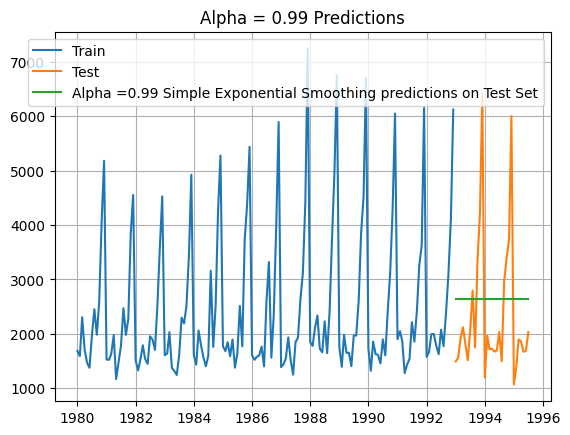

In [53]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [54]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [55]:

import statsmodels.tools.eval_measures as em
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1294.7069553888293
SES RMSE (calculated using statsmodels): 1294.706955388829


In [56]:
resultsDf4 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf4

,Test RMSE
"Alpha=0.99,SES",1294.706955


In [57]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6414285714285713, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272733, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [58]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

,0
1993-01-01,5337.663570
1993-02-01,5411.752002
1993-03-01,5485.840435
1993-04-01,5559.928868
1993-05-01,5634.017300
1993-06-01,5708.105733
1993-07-01,5782.194166
1993-08-01,5856.282598
1993-09-01,5930.371031
1993-10-01,6004.459464


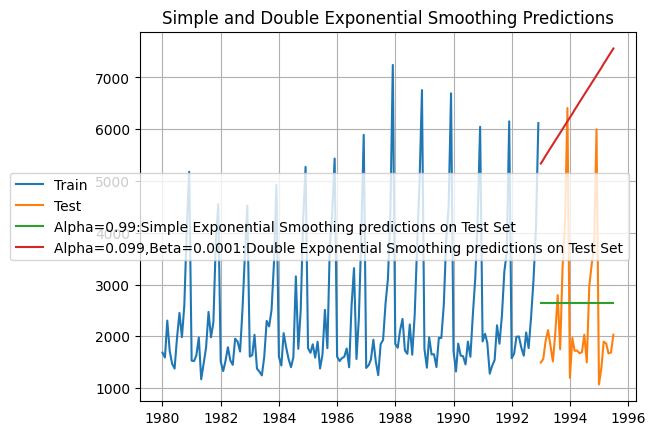

In [59]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [60]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 4352.107605042042


In [61]:
resultsDf5 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf5])
resultsDf

,Test RMSE
RegressionOnTime,1342.992772
SimpleAverageModel,1258.178011
2pointTrailingMovingAverage,769.337025
4pointTrailingMovingAverage,1122.415154
6pointTrailingMovingAverage,1298.119071
9pointTrailingMovingAverage,1451.127211
"Alpha=1,Beta=0.0189:DES",4352.107605


In [62]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06122185435482575, 'smoothing_trend': 0.021041249212026766, 'smoothing_seasonal': 0.46507233097160344, 'damping_trend': nan, 'initial_level': 2337.9674342045696, 'initial_trend': 0.42990295172783466, 'initial_seasons': array([-679.65893809, -757.00961096, -338.3572848 , -507.91559669,
       -853.33604091, -864.44439871, -398.24969167,  117.54230111,
       -303.75450451,  262.4590108 , 1635.12189352, 2668.76705925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [63]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

,0
1993-01-01,1708.247431
1993-02-01,1704.744899
1993-03-01,1937.416274
1993-04-01,1745.030296
1993-05-01,1646.450481
1993-06-01,1541.343131
1993-07-01,2062.244433
1993-08-01,1789.605880
1993-09-01,2385.888097
1993-10-01,3189.921549


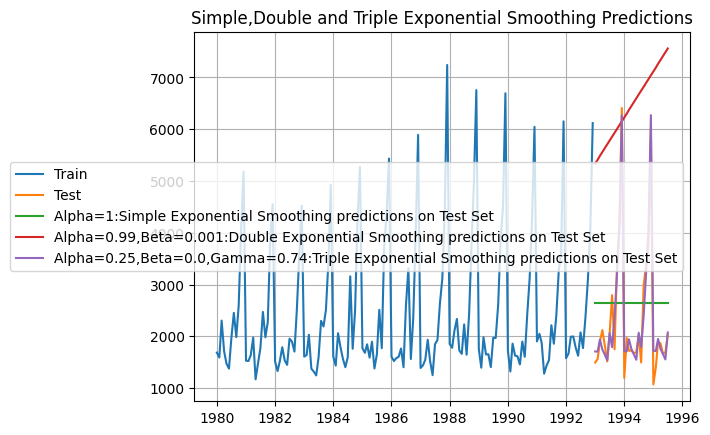

In [64]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [65]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 328.431197663055


In [66]:
resultsDf6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf6])
resultsDf

,Test RMSE
RegressionOnTime,1342.992772
SimpleAverageModel,1258.178011
2pointTrailingMovingAverage,769.337025
4pointTrailingMovingAverage,1122.415154
6pointTrailingMovingAverage,1298.119071
9pointTrailingMovingAverage,1451.127211
"Alpha=1,Beta=0.0189:DES",4352.107605
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",328.431198


In [67]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07603053904021945, 'smoothing_trend': 0.07600390531944044, 'smoothing_seasonal': 0.30813889457535076, 'damping_trend': nan, 'initial_level': 2355.7377369762557, 'initial_trend': -16.888651573168907, 'initial_seasons': array([0.72380717, 0.69288462, 0.90128071, 0.80909662, 0.66610528,
       0.65734959, 0.88402862, 1.14407634, 0.95417061, 1.24909483,
       1.93349639, 2.49361218]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [68]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

,0
1993-01-01,1713.109868
1993-02-01,1670.005416
1993-03-01,1916.646252
1993-04-01,1742.012894
1993-05-01,1638.083216
1993-06-01,1516.924806
1993-07-01,2049.569354
1993-08-01,1892.483121
1993-09-01,2377.990645
1993-10-01,3214.559251


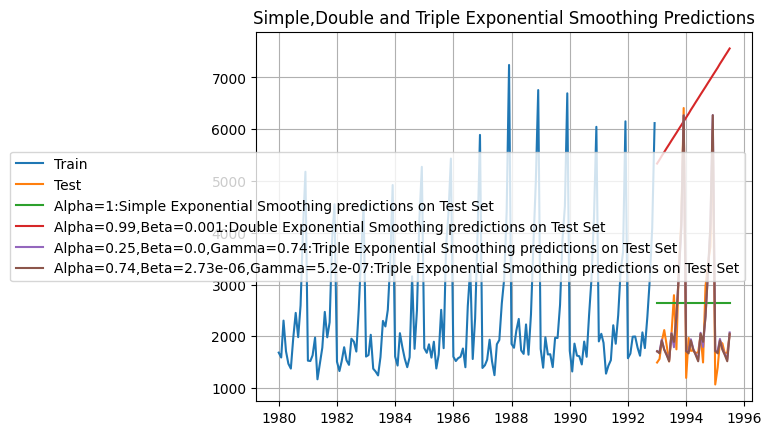

In [69]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [70]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 322.96928659170607


In [71]:
resultsDf7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf7])
resultsDf

,Test RMSE
RegressionOnTime,1342.992772
SimpleAverageModel,1258.178011
2pointTrailingMovingAverage,769.337025
4pointTrailingMovingAverage,1122.415154
6pointTrailingMovingAverage,1298.119071
9pointTrailingMovingAverage,1451.127211
"Alpha=1,Beta=0.0189:DES",4352.107605
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",328.431198
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",322.969287


Conclusion: The TES model with parameters (Alpha=0.74, Beta=2.73e-06, Gamma=5.2e-07, Gamma=0) provides the most accurate predictions in this case, significantly outperforming the other models. The DES model also performs relatively well, while the other TES model and SES model are less accurate.

## 4. Check for Stationarity

### 4.1 Check for stationarity

### 4.2 Make the data stationary (if needed)

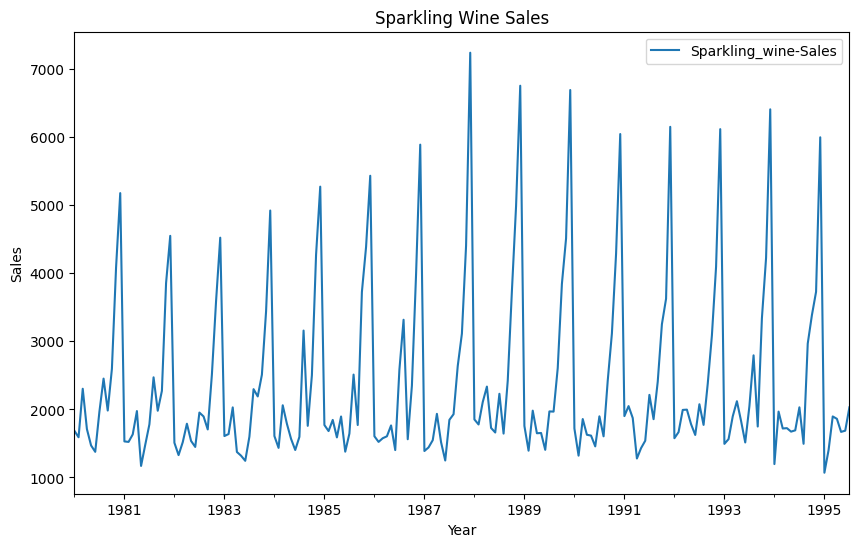

ADF Test for Original Data:
ADF Statistic: -1.3604974548123345
p-value: 0.6010608871634866
Critial Values:
   1%, -3.4682803641749267
Critial Values:
   5%, -2.8782017240816327
Critial Values:
   10%, -2.5756525795918366

ADF Test for Differenced Data:
ADF Statistic: -45.05030093619526
p-value: 0.0
Critial Values:
   1%, -3.4682803641749267
Critial Values:
   5%, -2.8782017240816327
Critial Values:
   10%, -2.5756525795918366

ADF Test for log transformed Data:
ADF Statistic: -7.4257368525129825
p-value: 6.556332649815353e-11
Critial Values:
   1%, -3.4924012594942333
Critial Values:
   5%, -2.8886968193364835
Critial Values:
   10%, -2.5812552709190673


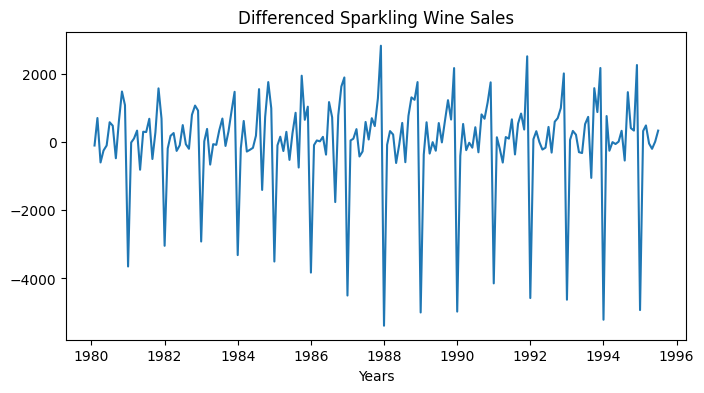

In [72]:
data_seasonal_diff = sparkling_data_dropped['Sparkling_wine-Sales']

# Step 3: Check for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')


# Visualize the data
plt.figure(figsize=(10, 6))
data_seasonal_diff .plot()
plt.title('Sparkling Wine Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Perform ADF test
print("ADF Test for Original Data:")
adf_test(data_seasonal_diff )

# Step 4: Differencing to make the data stationary (if needed)
plt.figure(figsize=(8, 4))
plt.plot(data_seasonal_diff.diff(1).dropna())
plt.xlabel('Years')
plt.title('Differenced Sparkling Wine Sales')

# Re-check for stationarity after differencing
print("\nADF Test for Differenced Data:")
adf_test(data_seasonal_diff.diff(1).dropna())

data_seasonal_diff=data_seasonal_diff.diff(1).dropna()

# ... (rest of the code remains the same)

# Re-check for stationarity after log transformation
print("\nADF Test for log transformed Data:")
# Handle potential negative or zero values before applying log
safe_log_data = np.log10(data_seasonal_diff[data_seasonal_diff > 0])  # Apply log to positive values only
adf_test(safe_log_data)






## 5. Model Building - Stationary Data

### 5.1 Generate ACF & PACF Plot and find the AR, MA values.




In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

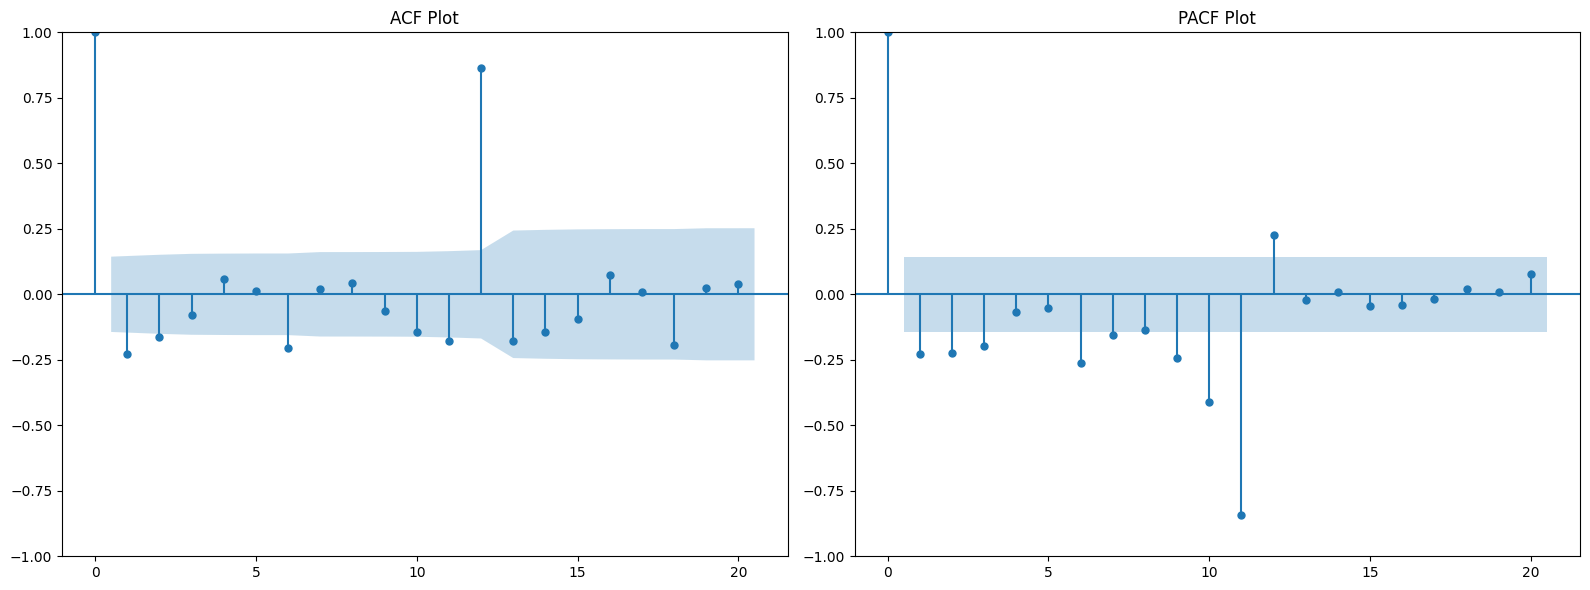

In [74]:
# Generate ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot
sm.graphics.tsa.plot_acf(data_seasonal_diff, lags=20, ax=axes[0])
axes[0].set_title('ACF Plot')

# PACF plot
sm.graphics.tsa.plot_pacf(data_seasonal_diff, lags=20, method='ywm', ax=axes[1])
axes[1].set_title('PACF Plot')

plt.tight_layout()
plt.show()

Observation :

p= 3
q=2
d=1

### 5.2 Build different ARIMA models - Auto ARIMA Manual ARIMA




# <u> Auto Arima </u>

In [75]:
!pip install pmdarima


In [76]:
import pmdarima as pm
model = pm.auto_arima(data_seasonal_diff,start_p=1,start_q=1,test='adf',max_p=3,max_q=2,m=1,d=None,seasonal=False,start_P=0,D=0,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

#print model summary

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3239.342, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3231.597, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3224.011, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3218.873, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3220.873, Time=0.08 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 2.538 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  186
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -1605.437
Date:                Sun, 18 Aug 2024   AIC                          

In [77]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

best_model = ARIMA(data_seasonal_diff,order = (3,0,0))
best_results = best_model.fit()

In [78]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [79]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [80]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [81]:
testCopy1['sales_ts_forecasted'] = sales_ts_forecasted.reindex(testCopy1.index)

In [82]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling_wine-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1832.865


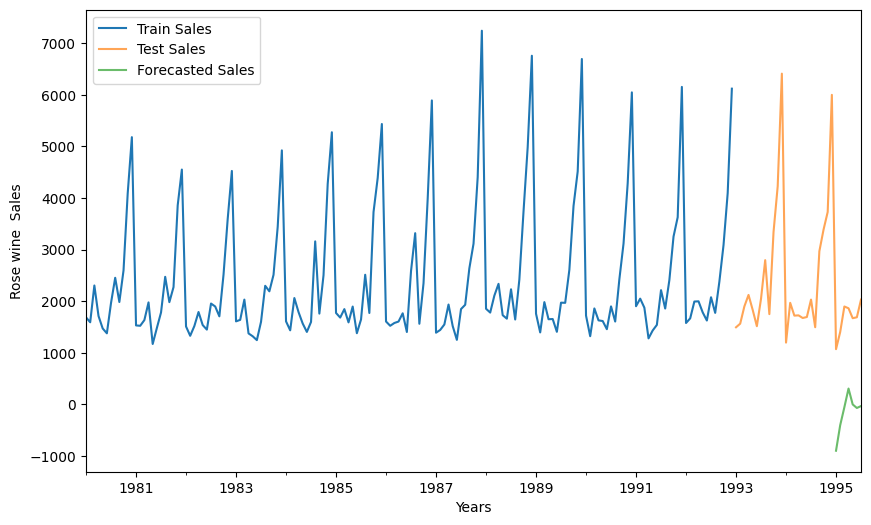

In [83]:
axis = train['Sparkling_wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling_wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine  Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [84]:
resultsDf8 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best Auto ARIMA  Model : ARIMA(3,0,0)'])

resultsDf=pd.concat([resultsDf,resultsDf8])
resultsDf


,Test RMSE
RegressionOnTime,1342.992772
SimpleAverageModel,1258.178011
2pointTrailingMovingAverage,769.337025
4pointTrailingMovingAverage,1122.415154
6pointTrailingMovingAverage,1298.119071
9pointTrailingMovingAverage,1451.127211
"Alpha=1,Beta=0.0189:DES",4352.107605
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",328.431198
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",322.969287
"Best Auto ARIMA Model : ARIMA(3,0,0)",1832.865189


## <u> Manual ARIMA Model
<font color='blue'> building to estimate best'p' , 'd' , 'q' paramters ( Lowest AIC Approach )</u> </font>

In [85]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

In [86]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

In [87]:
import itertools # Import the itertools module

d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [88]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [89]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

for param in pdq:
    ARIMA_model = ARIMA(data_seasonal_diff,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    # Create a temporary DataFrame for the new row
    temp_df = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    # Use concat to append the new row to the main DataFrame
    ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)

ARIMA(1, 0, 1) - AIC:3178.5901342193915


<ipython-input-89-521de7edc4fc>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)


ARIMA(1, 0, 2) - AIC:3178.452684085122
ARIMA(1, 0, 3) - AIC:3166.723549875457
ARIMA(1, 1, 1) - AIC:3222.1491060648045
ARIMA(1, 1, 2) - AIC:3173.9037800873175


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC:3212.0019070701387


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1) - AIC:3177.3728537447555
ARIMA(2, 0, 2) - AIC:3174.9988841831737


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:3174.695994422419
ARIMA(2, 1, 1) - AIC:3214.9793589173673


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 2) - AIC:3171.070207790017


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:3214.9287477055636


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 1) - AIC:3177.9923393255212


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 2) - AIC:3170.722986131974
ARIMA(3, 0, 3) - AIC:3159.4944988709763
ARIMA(3, 1, 1) - AIC:3210.1881053165243
ARIMA(3, 1, 2) - AIC:3205.0872680987077
ARIMA(3, 1, 3) - AIC:3187.7488567885944


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",3159.494499
2,"(1, 0, 3)",3166.723550
13,"(3, 0, 2)",3170.722986
10,"(2, 1, 2)",3171.070208
4,"(1, 1, 2)",3173.903780


#### <u>Building ARIMA model with best parameters p,d,q</u>

In [91]:

best_model = ARIMA(data_seasonal_diff,order = (3,0,2))
best_results = best_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                SARIMAX Results                                 
Dep. Variable:     Sparkling_wine-Sales   No. Observations:                  186
Model:                   ARIMA(3, 0, 2)   Log Likelihood               -1578.361
Date:                  Sun, 18 Aug 2024   AIC                           3170.723
Time:                          17:03:30   BIC                           3193.303
Sample:                      02-01-1980   HQIC                          3179.873
                           - 07-01-1995                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8486      2.428      1.173      0.241      -1.910       7.607
ar.L1         -0.5598      0.004   -128.468      0.000      -0.568      -0.551
ar.L2          0.2339      0.096    

#### <u>Calculating RMSE for best ARIMA model </u>

In [93]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [94]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [95]:
pred99

In [96]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)


In [97]:
testCopy1['sales_ts_forecasted'] = sales_ts_forecasted.reindex(testCopy1.index)

In [98]:
print(testCopy1.index)
print(sales_ts_forecasted.index)

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01', '1993-11-01', '1993-12-01',
               '1994-01-01', '1994-02-01', '1994-03-01', '1994-04-01',
               '1994-05-01', '1994-06-01', '1994-07-01', '1994-08-01',
               '1994-09-01', '1994-10-01', '1994-11-01', '1994-12-01',
               '1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', freq='MS')


In [99]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling_wine-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 2265.775


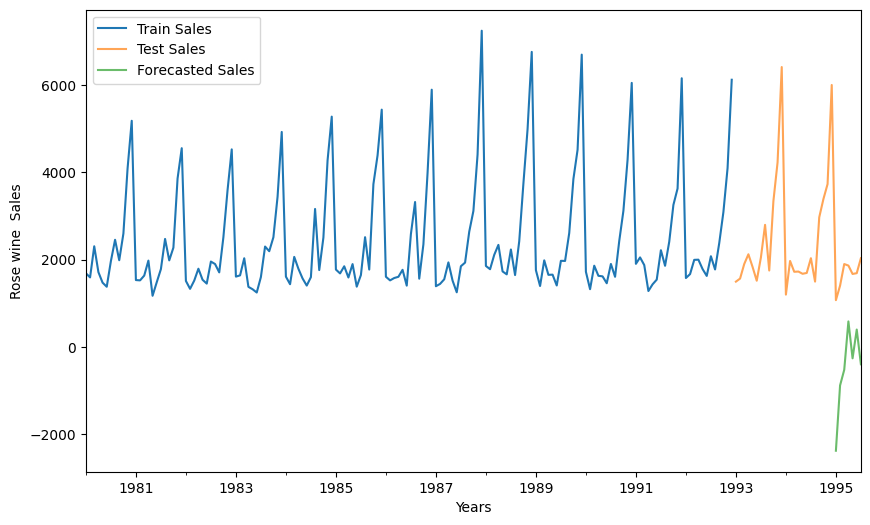

In [100]:
axis = train['Sparkling_wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling_wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine  Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [101]:
resultsDf9 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best ARIMA Manual Model : ARIMA(3,0,2)'])

resultsDf=pd.concat([resultsDf,resultsDf9])
resultsDf

,Test RMSE
RegressionOnTime,1342.992772
SimpleAverageModel,1258.178011
2pointTrailingMovingAverage,769.337025
4pointTrailingMovingAverage,1122.415154
6pointTrailingMovingAverage,1298.119071
9pointTrailingMovingAverage,1451.127211
"Alpha=1,Beta=0.0189:DES",4352.107605
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",328.431198
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",322.969287
"Best Auto ARIMA Model : ARIMA(3,0,0)",1832.865189


### 5.3 Build different SARIMA models Auto SARIMA - Manual SARIMA




## AUTO SARIMA Model

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=2581.218, Time=1.96 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2617.570, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2589.608, Time=0.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2577.638, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2615.591, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2617.620, Time=0.11 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=2579.414, Time=1.62 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=2579.433, Time=4.71 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2589.316, Time=1.53 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=2581.251, Time=4.34 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2578.588, Time=0.71 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2579.450, Time=1.10 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=2579.565, Time=1.57 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2577.766, Time=0.82 sec
 ARIMA(1,0,2)(0,1,1

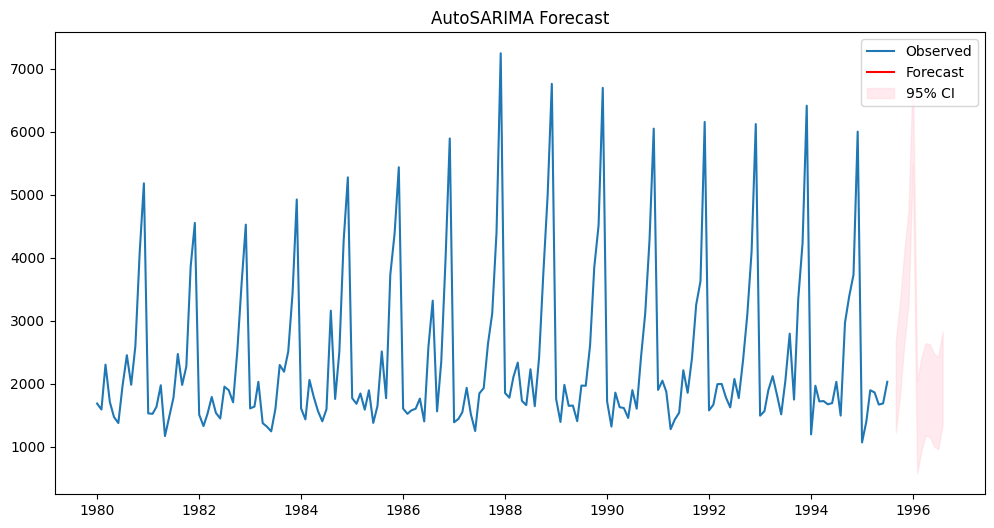

In [102]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define seasonal period, e.g., 12 for monthly data with yearly seasonality
seasonal_period = 12

# Fit AutoSARIMA model
auto_model = pm.auto_arima(sparkling_data['Sparkling_wine-Sales'],
                           start_p=1,
                           start_q=1,
                           seasonal=True,
                           m=seasonal_period,
                           stepwise=True,
                           trace=True)

# Print the summary of the best model
print(auto_model.summary())

# Forecast future values
n_forecast = 12  # Forecasting 12 months ahead
forecast, conf_int = auto_model.predict(n_periods=n_forecast, return_conf_int=True)

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=sparkling_data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['Lower CI', 'Upper CI'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(sparkling_data.index, sparkling_data['Sparkling_wine-Sales'], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='Forecast')
plt.fill_between(conf_int_df.index, conf_int_df['Lower CI'], conf_int_df['Upper CI'], color='pink', alpha=0.3, label='95% CI')
plt.title('AutoSARIMA Forecast')
plt.legend()

# Calculate RMSE on the training data
train_predictions = auto_model.predict_in_sample()
train_actual = sparkling_data['Sparkling_wine-Sales'].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(train_actual, train_predictions))
print(f'RMSE: {rmse:.4f}')

# Create a DataFrame to show the RMSE in tabular format
rmse_df = pd.DataFrame({'Model': ['AutoSARIMA'], 'RMSE': [rmse]})
print(rmse_df)


In [103]:
best_model = sm.tsa.statespace.SARIMAX(data_seasonal_diff,
                                      order=(0, 0, 1),
                                      seasonal_order=(0, 1, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [104]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [105]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [106]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [107]:
testCopy1['sales_ts_forecasted'] = sales_ts_forecasted.reindex(testCopy1.index)

In [108]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling_wine-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 2628.992


In [109]:
resultsDf10 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best  Auto SARIMA Model : SARIMAX(0, 0, 1)x(0, 1, 1, 12)'])

resultsDf=pd.concat([resultsDf,resultsDf10])
resultsDf

,Test RMSE
RegressionOnTime,1342.992772
SimpleAverageModel,1258.178011
2pointTrailingMovingAverage,769.337025
4pointTrailingMovingAverage,1122.415154
6pointTrailingMovingAverage,1298.119071
9pointTrailingMovingAverage,1451.127211
"Alpha=1,Beta=0.0189:DES",4352.107605
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",328.431198
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",322.969287
"Best Auto ARIMA Model : ARIMA(3,0,0)",1832.865189


## MANUAL SARIMA model

In [110]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [111]:
# import statsmodels.api as sm

# SARIMA_AIC_list = [] # Create an empty list to store the results

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         SARIMA_model = sm.tsa.statespace.SARIMAX(data_seasonal_diff,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#         results_SARIMA = SARIMA_model.fit(maxiter=1000)
#         print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
#         # Append the results as a dictionary to the list
#         SARIMA_AIC_list.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic})

# # Create the DataFrame after the loop
# SARIMA_AIC = pd.DataFrame(SARIMA_AIC_list)

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

SARIMA_AIC_list = []  # Create an empty list to store the results

# Iterate over the possible combinations of p, d, q and seasonal (P, D, Q, m)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(data_seasonal_diff,
                                                 order=param,
                                                 seasonal_order=param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        # Append the results as a dictionary to the list
        SARIMA_AIC_list.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic})

# Create the DataFrame after the loop
SARIMA_AIC = pd.DataFrame(SARIMA_AIC_list)

# Identify the best model (lowest AIC)
best_model = SARIMA_AIC.loc[SARIMA_AIC['AIC'].idxmin()]
print(f"Best model: SARIMA{best_model['param']}x{best_model['seasonal']} with AIC:{best_model['AIC']}")

# Fit the best model
best_SARIMA_model = sm.tsa.statespace.SARIMAX(data_seasonal_diff,
                                              order=best_model['param'],
                                              seasonal_order=best_model['seasonal'],
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
best_results_SARIMA = best_SARIMA_model.fit(maxiter=1000)

# Predict on the training data
train_predictions = best_results_SARIMA.predict(start=0, end=len(data_seasonal_diff) - 1)
train_actual = data_seasonal_diff.values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(train_actual, train_predictions))
print(f'RMSE: {rmse:.4f}')

# Create a DataFrame to show the best model's parameters and RMSE
best_model_df = pd.DataFrame({
    'Model': [f'SARIMA{best_model["param"]}x{best_model["seasonal"]}'],
    'AIC': [best_model['AIC']],
    'RMSE': [rmse]
})

print(best_model_df)


SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2543.771961939444
SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:2375.7076383038716
SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:2207.3575587317127
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:2371.8502830402413
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:2201.1713357003237
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:2031.485641694541
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:2389.8436908389913
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:2379.1035959151195
SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:2207.643820018976
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:2216.7606804085835
SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:2202.737376395818
SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:2027.6441691128944
SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:2221.5427752032674
SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:2222.236256726007
SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:2206.453763560317
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:2045.927685140813
SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:2047.8520488086278
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:2032.4193700432743
SARIMA(1, 0, 2)x(

In [ ]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

SARIMA_AIC.sort_values(by='AIC',ascending=True).head()

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(data_seasonal_diff,
                                      order=(2, 0, 1),
                                      seasonal_order=(2, 1, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

Calculating RMSE for best SARIMA model

---



In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

In [ ]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [ ]:
pred99

In [ ]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
testCopy1['sales_ts_forecasted'] = sales_ts_forecasted.reindex(testCopy1.index)

In [ ]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling_wine-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

In [ ]:
axis = train['Sparkling_wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling_wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
resultsDf11 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best  Manual SARIMA Model : SARIMAX(2, 0, 1)x(2, 1, 1, 12)'])

resultsDf=pd.concat([resultsDf,resultsDf11])
resultsDf

### 5.4 Check the performance of the models built

## 6.Compare the performance of the models



### 6.1 Compare the performance of all the models built



### 6.2 Choose the best model with proper rationale



#### <u>Forecast sales using the best fit SARIMA model as per RMSE </u>

## 7.Actionable Insights & Recommendations

### 7.1 Conclude with the key takeaways (actionable insights and recommendations) for the business

In [ ]:
# Get forecast 12 steps (1 years) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

# Extract predicted mean from the forecast results object
predicted_mean_95 = pred_uc_95.predicted_mean

# Adjust the index to match the length of the forecast
# The original index was twice the length needed
idx = pd.date_range(start='1996-01-01', periods=n_steps, freq='MS')

# Use the extracted predicted mean in the DataFrame creation
fc_95 = pd.DataFrame(np.column_stack([np.power(10, predicted_mean_95), np.power(10, pred_ci_95)]),
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]),
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

In [ ]:
# plot the forecast along with the confidence band

axis = sales_rs.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()